In [1]:
! git clone 'https://github.com/DS3001/project_chd'

fatal: destination path 'project_chd' already exists and is not an empty directory.


- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df_train = pd.read_csv('/content/project_chd/fhs_train.csv')

In [4]:
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')

In [5]:
nan_count = df_train.isna().sum()

print(nan_count)

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [6]:
df_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


<Axes: >

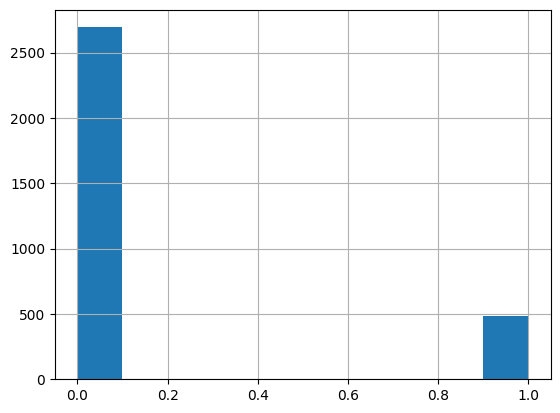

In [7]:
df_train["TenYearCHD"].hist()

In [8]:
df_train.corr()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Unnamed: 0,1.000000,0.028560,0.003256,0.003224,0.013659,0.005077,0.011981,0.020691,0.017232,0.047541,-0.002499,-0.001416,-0.003690,0.001806,0.042063,0.032639,-0.019496
sex,0.028560,1.000000,-0.038939,0.006745,0.198117,0.327893,-0.043688,0.007104,0.010722,0.020140,-0.071023,-0.027647,0.064950,0.083577,-0.109369,0.016639,0.097138
age,0.003256,-0.038939,1.000000,-0.176825,-0.216628,-0.201243,0.114807,0.064746,0.298794,0.094140,0.263317,0.396181,0.207611,0.138713,-0.016787,0.110138,0.225568
education,0.003224,0.006745,-0.176825,1.000000,0.014989,0.005721,-0.013907,-0.031525,-0.084230,-0.041414,-0.027894,-0.140590,-0.068479,-0.150210,-0.075420,-0.044037,-0.052668
currentSmoker,0.013659,0.198117,-0.216628,0.014989,1.000000,0.766473,-0.051624,-0.033461,-0.098607,-0.038440,-0.024813,-0.133829,-0.102881,-0.176686,0.064442,-0.060568,0.001644
cigsPerDay,0.005077,0.327893,-0.201243,0.005721,0.766473,1.000000,-0.047041,-0.030623,-0.067209,-0.034708,-0.015547,-0.091574,-0.050735,-0.095727,0.080058,-0.064437,0.047712
BPMeds,0.011981,-0.043688,0.114807,-0.013907,-0.051624,-0.047041,1.000000,0.127704,0.254690,0.053874,0.073698,0.252585,0.200810,0.091004,-0.005829,0.028597,0.088135
prevalentStroke,0.020691,0.007104,0.064746,-0.031525,-0.033461,-0.030623,0.127704,1.000000,0.068668,-0.013348,-0.009028,0.056260,0.038972,0.005215,-0.024421,0.005178,0.062357
prevalentHyp,0.017232,0.010722,0.298794,-0.084230,-0.098607,-0.067209,0.254690,0.068668,1.000000,0.081750,0.166555,0.690353,0.614522,0.300526,0.146410,0.086814,0.163910
diabetes,0.047541,0.020140,0.094140,-0.041414,-0.038440,-0.034708,0.053874,-0.013348,0.081750,1.000000,0.044650,0.104852,0.045949,0.086582,0.043512,0.612154,0.105644


In [9]:
# looking at correlation to ten year risk of CHD: age, prevalent hyp, diabetes, sys BP, and glucose all seem to be positively correlated
# Ashley: 1st 3
# Anna: last 3

In [10]:
# cleaning diabetes

<Axes: xlabel='diabetes', ylabel='Count'>

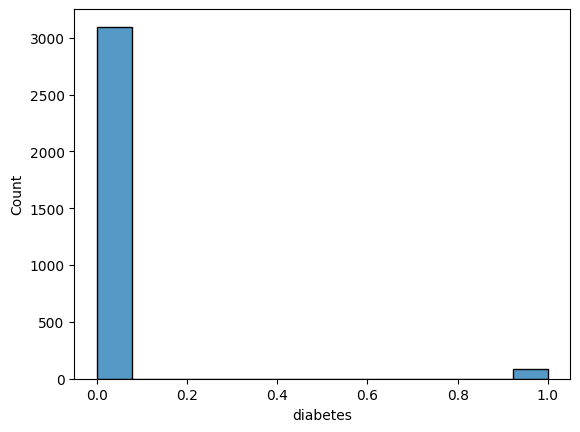

In [11]:
var = df_train["diabetes"]
sns.histplot(var)

#binary variable - either has diabetes or doesn't

In [12]:
var.value_counts()
#very few have diabetes

diabetes
0    3097
1      83
Name: count, dtype: int64

In [13]:
pd.crosstab(var,df_train["TenYearCHD"])


TenYearCHD,0,1
diabetes,,
0,2642,455
1,51,32


In [14]:
print("percent without diabetes with CHD risk: ",455/(2642+455))
print("percent with diabetes with CHD risk: ",32/(51+32))

percent without diabetes with CHD risk:  0.14691637068130448
percent with diabetes with CHD risk:  0.3855421686746988


In [15]:
#obviously a huge difference between those with and without diabetes

In [16]:
#cleaning sys BP

<Axes: xlabel='sysBP', ylabel='Count'>

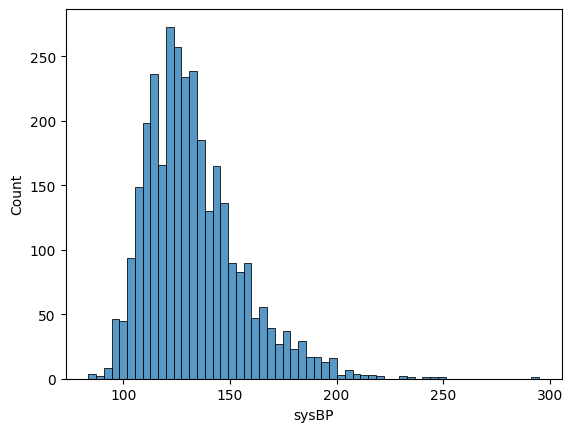

In [17]:
var = df_train["sysBP"]
sns.histplot(var)

<Axes: ylabel='sysBP'>

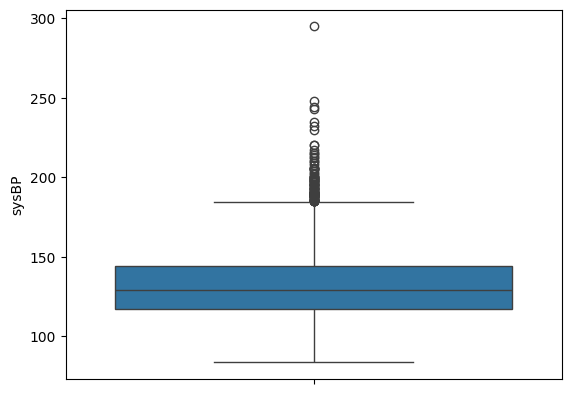

In [18]:
#lots of outliers
sns.boxplot(var)

In [19]:
#use arcsign to account for outliers
df_train['sysBP_arc'] = np.arcsinh(df_train['sysBP'])
df_test['sysBP_arc'] = np.arcsinh(df_test['sysBP'])

<Axes: xlabel='sysBP', ylabel='Density'>

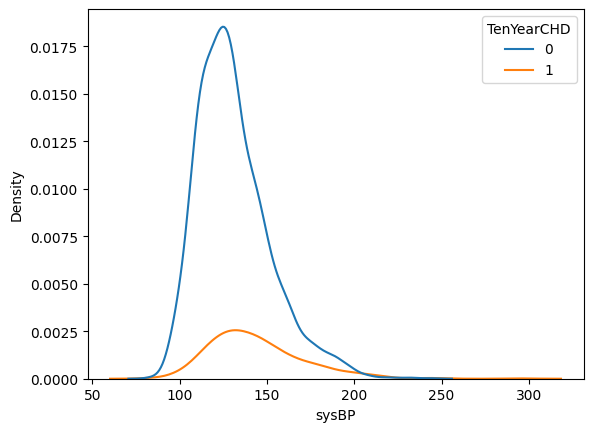

In [20]:
sns.kdeplot(x=df_train['sysBP'], hue=df_train['TenYearCHD'])

<Axes: xlabel='sysBP_arc', ylabel='Density'>

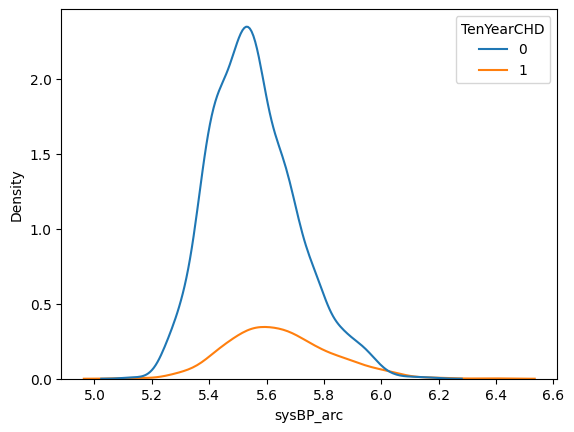

In [21]:
sns.kdeplot(x=df_train['sysBP_arc'], hue=df_train['TenYearCHD'])

<Axes: ylabel='sysBP_arc'>

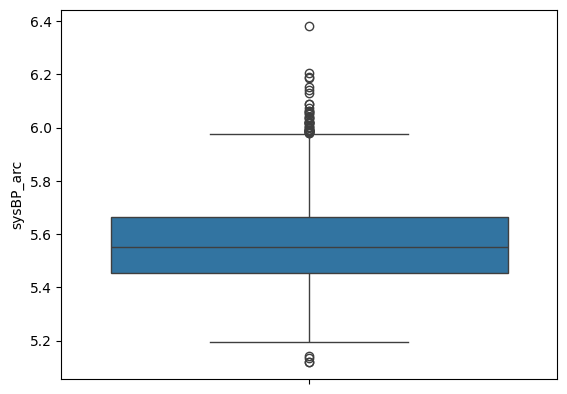

In [22]:
sns.boxplot(df_train['sysBP_arc'])

In [23]:
#still have some outliers, but the data looks much better than before

In [24]:
#clean glucose

In [25]:
df_train["glucose"].describe()

count    2895.000000
mean       81.833506
std        23.625357
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [62]:
pd.crosstab(df_train["glucose"].isna(),df_train["TenYearCHD"])

TenYearCHD,0,1
glucose,,
False,2442,453
True,251,34


In [64]:
# proportion of each that are missing

print("no risk: ",251/(2442+251))
print("risk",34/(453+34))

no risk:  0.09320460453026365
risk 0.06981519507186858


In [65]:
#these proportions are pretty similar, and we don't want to lose all of the data that's missing, especially
# the smaller dataset, so just going to replace all missing values with means
# if there were patterns in missing values, then we'd have to rethink how we handle the nans

In [66]:
# fill nan values with mean values
df_train["glucose_clean"] = df_train["glucose"].fillna(78)
df_test["glucose_clean"] = df_test["glucose"].fillna(78) #df_test is supposed to be a black box - is it right to replace w mean of df_train?

In [27]:
df_train["glucose_clean"].describe()

count    3180.000000
mean       81.489937
std        22.568066
min        40.000000
25%        72.000000
50%        78.000000
75%        85.000000
max       394.000000
Name: glucose_clean, dtype: float64

<Axes: ylabel='glucose_clean'>

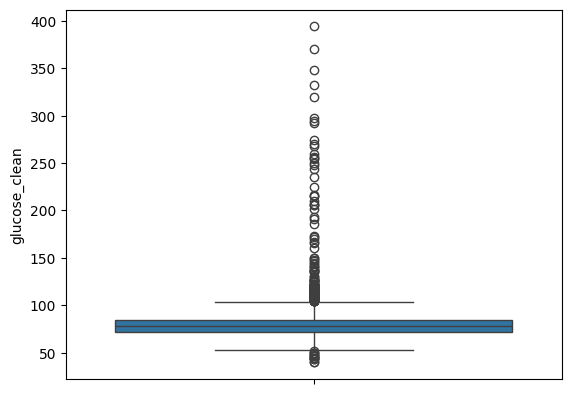

In [28]:
var = df_train['glucose_clean']
sns.boxplot(var)
#this is looking rough

In [29]:
var.groupby(df_train["TenYearCHD"]).describe()
# trying to figure out where the outliers are coming from
# it seems like the values are pretty similar except for the max

,count,mean,std,min,25%,50%,75%,max
TenYearCHD,,,,,,,,
0,2693.0,80.30932,18.026657,40.0,72.0,78.0,85.0,370.0
1,487.0,88.01848,38.485122,40.0,72.5,78.0,88.0,394.0


In [30]:
#looking at the distribution

<Axes: xlabel='glucose_clean', ylabel='Density'>

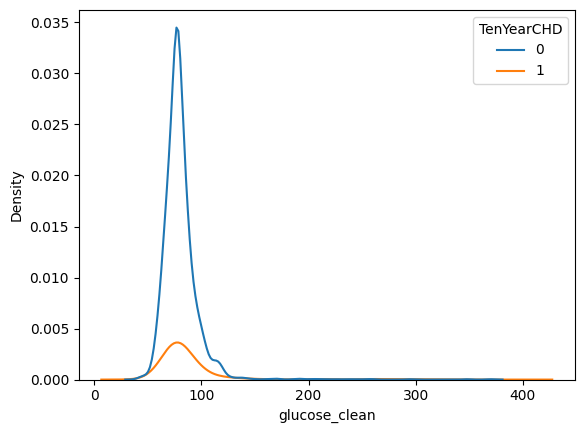

In [31]:
sns.kdeplot(x=df_train['glucose_clean'], hue=df_train['TenYearCHD'])

In [32]:
# use the arcsign again to try to smooth out the curve & address outliers

In [33]:
df_train["glucose_arc"]=np.arcsinh(df_train["glucose_clean"])
df_test["glucose_arc"]=np.arcsinh(df_test["glucose_clean"])

<Axes: ylabel='glucose_arc'>

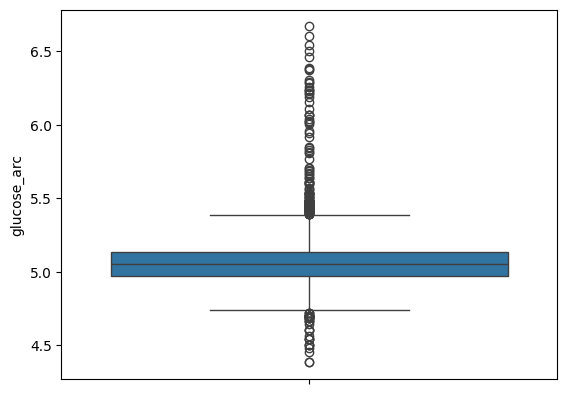

In [34]:
sns.boxplot(df_train["glucose_arc"])
#a bit more evened out but still not really looking great

<Axes: xlabel='TenYearCHD', ylabel='Count'>

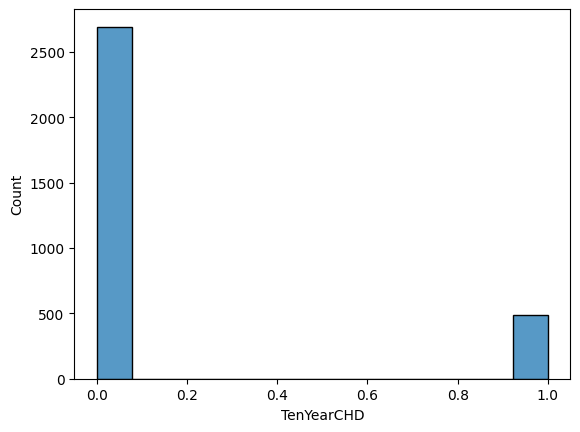

In [35]:
# cleaning TenYearCHD
var = df_train["TenYearCHD"]
sns.histplot(var)

# TenYearCHD also binary, either have risk of coronary heart disease in 10 years or not

In [36]:
var.value_counts()

# less people have the risk to get coronary heart disease in 10 years than have the risk
# this variable is already pretty clean so no need to do any cleaning

TenYearCHD
0    2693
1     487
Name: count, dtype: int64

In [37]:
# cleaning age
var = df_train["age"]
var.value_counts()

# youngest age is 32 and oldest is 70
# most instances are right in the middle around 48

age
48    139
42    139
40    138
46    137
41    136
39    125
45    125
43    116
44    116
55    113
52    113
38    112
47    107
53    104
54    103
51    101
50    100
49    100
56     93
58     91
60     90
61     87
59     86
63     85
57     84
62     75
64     66
37     63
36     60
65     50
67     31
35     30
66     29
34     14
68     10
33      5
69      4
70      2
32      1
Name: count, dtype: int64

In [38]:
pd.crosstab(var,df_train["TenYearCHD"])
# clearly a steady increase in risk of getting coronary heart disease in 10 years as you get older

TenYearCHD,0,1
age,,
32,1,0
33,5,0
34,14,0
35,28,2
36,57,3
37,61,2
38,104,8
39,121,4
40,130,8


<Axes: xlabel='age', ylabel='Count'>

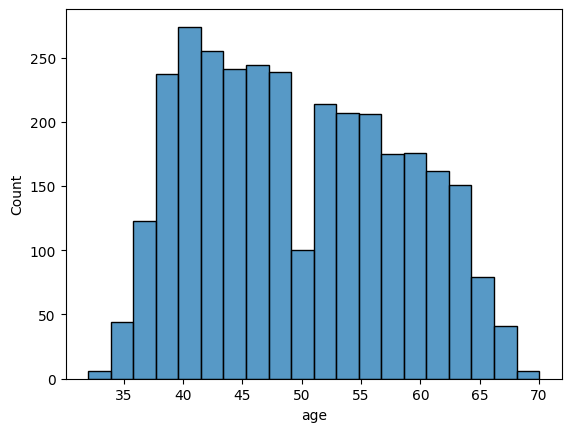

In [39]:
sns.histplot(var)

<Axes: ylabel='age'>

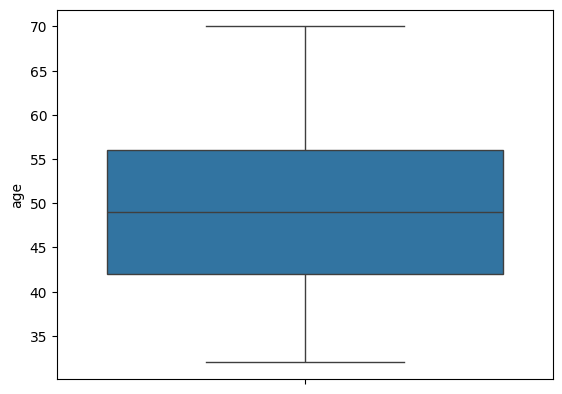

In [40]:
sns.boxplot(var)

# no outliers!

In [41]:
# cleaning prevalentHyp
var = df_train["prevalentHyp"]
var.value_counts()
# prevalentHyp also binary, either are hypertensive or not

prevalentHyp
0    2159
1    1021
Name: count, dtype: int64

In [42]:
pd.crosstab(var,df_train["TenYearCHD"])
#

TenYearCHD,0,1
prevalentHyp,,
0,1916,243
1,777,244


In [43]:
print("percent not hypertensive with CHD risk: ",243/(1916+243))
print("percent hypertensive with CHD risk: ",244/(777+244))

# there is a noticeable difference that those who are hypertensive are more likely to have CHD risk than those who are not hypertensive

percent not hypertensive with CHD risk:  0.11255210745715609
percent hypertensive with CHD risk:  0.23898139079333985


In [44]:
#since we're dealing with health data, an outlier might be an important point to include. Maybe really high or low values of glucose are very predictive
#and important to include in our model. Thus, we are not removing outliers but leaving them in.
#maybe we will iterate through regressions with and without outliers to see how it impacts the accurracy of the model

In [45]:
#looking to see if theres any immediate trends

<Axes: xlabel='glucose_arc', ylabel='sysBP_arc'>

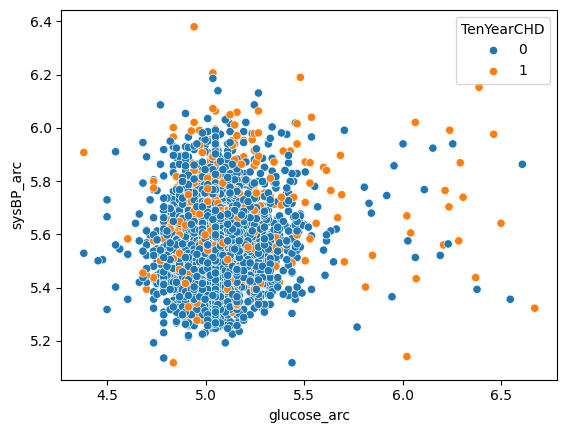

In [46]:
sns.scatterplot(x=df_train['glucose_arc'],y=df_train["sysBP_arc"],hue = df_train['TenYearCHD'])
#looking kind of like a hot mess , with outliers both with and without risk of CHD

In [47]:
# building model - first iteration

In [48]:
from sklearn import linear_model

In [49]:
y = df_train['TenYearCHD']
y_test = df_test["TenYearCHD"]

In [50]:
train_vars = ['diabetes','glucose_arc','sysBP_arc',"prevalentHyp", 'age']
X = df_train.loc[:,train_vars ]
X_test = df_test.loc[:,train_vars]

In [51]:
Z_train = pd.concat([X['age'], X['diabetes'],X['glucose_arc'],X['sysBP_arc'],X['prevalentHyp']], axis = 1)
Z_test = pd.concat([X_test['age'], X_test['diabetes'],X_test['glucose_arc'],X_test['sysBP_arc'],X_test['prevalentHyp']], axis = 1)
#create test and train

In [52]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y) # Run regression

In [53]:
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.0688923887275934
RMSE:  0.34275813766822455


,variable,coefficient
0,age,0.007617
1,diabetes,0.193602
2,glucose_arc,-0.019020
3,sysBP_arc,-0.028832
4,prevalentHyp,0.085999


In [54]:
# r squared looking really poor - could potentially take out some variables, take out outliers, or change the way data is cleaned.

In [55]:
# are variables trying to explain the same things?

In [56]:
X.corr()
#diabetes and glucose are pretty highly correlated - what happens when we drop one of these variables?

,diabetes,glucose_arc,sysBP_arc,prevalentHyp,age
diabetes,1.000000,0.504517,0.098316,0.081750,0.094140
glucose_arc,0.504517,1.000000,0.125302,0.088913,0.118883
sysBP_arc,0.098316,0.125302,1.000000,0.692539,0.397665
prevalentHyp,0.081750,0.088913,0.692539,1.000000,0.298794
age,0.094140,0.118883,0.397665,0.298794,1.000000


In [67]:
train_vars = ['glucose_arc','sysBP_arc',"prevalentHyp", 'age']
X = df_train.loc[:,train_vars ]
X_test = df_test.loc[:,train_vars]

In [68]:
Z_train = pd.concat([X['age'], X['glucose_arc'],X['sysBP_arc'],X['prevalentHyp']], axis = 1)
Z_test = pd.concat([X_test['age'], X_test['glucose_arc'],X_test['sysBP_arc'],X_test['prevalentHyp']], axis = 1)
#create test and train

In [69]:
reg = linear_model.LinearRegression().fit(Z_train,y) # Run regression - take out fit intercept?

In [70]:
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.0804572982183166
RMSE:  0.34062285677475723


,variable,coefficient
0,age,0.007000
1,glucose_arc,0.127677
2,sysBP_arc,0.220514
3,prevalentHyp,0.030966
